
# **Practice Lab: K Means Clustering Lab**

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## Example 2: Segmenting Customer Data


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('./dataset/CustomerData.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
num_male = df[df['Gender'] == 'Male'].shape[0]
num_female = df[df['Gender'] == 'Female'].shape[0]

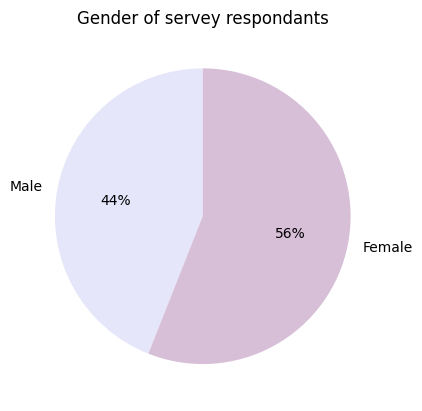

In [5]:
plt.pie(
    [num_male, num_female],
    labels=['Male', 'Female'],
    startangle=90, autopct='%1.f%%',
    colors=['lavender', 'thistle']
)
plt.title('Gender of servey respondants')
plt.show()

In [6]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

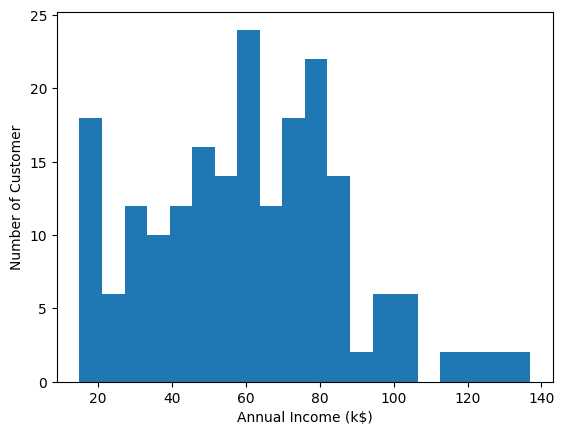

In [7]:
plt.hist(df['Annual Income (k$)'], bins=20)
plt.xlabel("Annual Income (k$)"); plt.ylabel("Number of Customer"); plt.show()

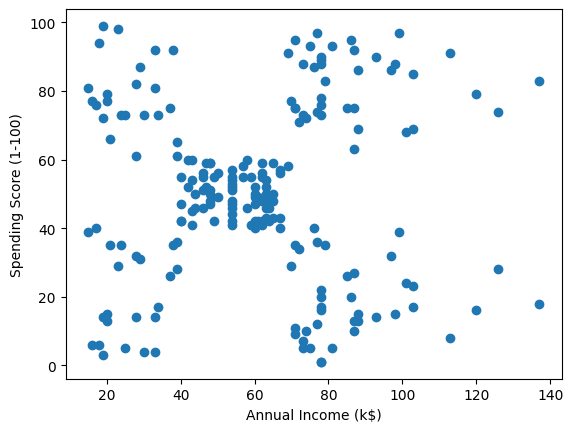

In [8]:
xlabel = 'Annual Income (k$)'
ylabel = 'Spending Score (1-100)'
X = df[[xlabel, ylabel]]
plt.scatter(X[xlabel], X[ylabel])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [9]:
km  = KMeans(n_clusters=5, random_state=42)
km.fit(X)

KMeans(n_clusters=5, random_state=42)

In [10]:
km.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

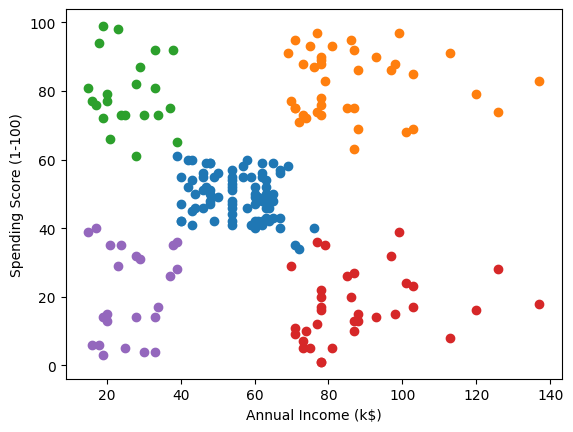

In [11]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual Income (k$)'], X_['Spending Score (1-100)'], label=label)
    
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()


## Example 3: Image Segmentation

In [12]:
img = plt.imread("./dataset/cameraman.png")
print(f'The image is {img.shape[0]}px by {img.shape[1]}px')

The image is 490px by 487px


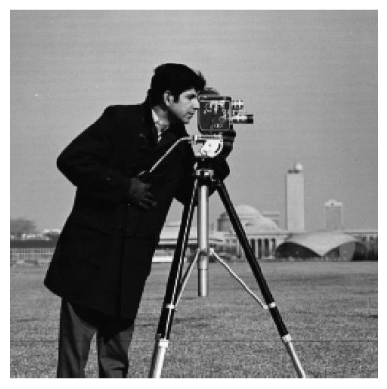

In [13]:
plt.axis('off')
plt.imshow(img)
plt.show()

### Segmenting the image using 2 clusters

In this example we will segment our image into <code>k = 2</code> color-clusters:

In [17]:
k = 2
X = img.reshape(-1, 1)
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

KMeans(n_clusters=2, random_state=42)

In [18]:
X

array([[0.9764706],
       [0.9764706],
       [0.9764706],
       ...,
       [0.9607843],
       [0.9607843],
       [1.       ]], dtype=float32)

In [19]:
seg = np.zeros(X.shape)
seg

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Awesome! Even as a human we can still easily recognize our image after segmentation with <code>k = 2</code> colors.

### Converting to black and white

Alternatively we may view the image in black and white:

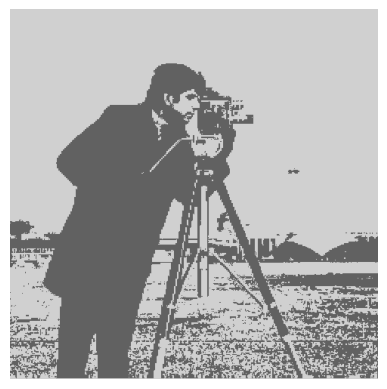

In [22]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape)
plt.axis('off')
plt.imshow(seg)

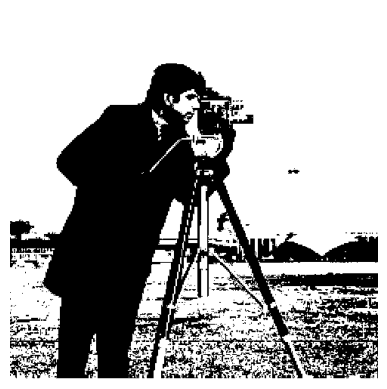

In [23]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = 255 if km.cluster_centers_[i] > 0.5 else 0
seg = seg.reshape(img.shape).astype(np.uint8)
plt.axis('off')
plt.imshow(seg)
plt.show()

# Exercises

In this section, we will segment another image; this time in full-color with various values for k.

Please run the following cell to load the data for the exercises:

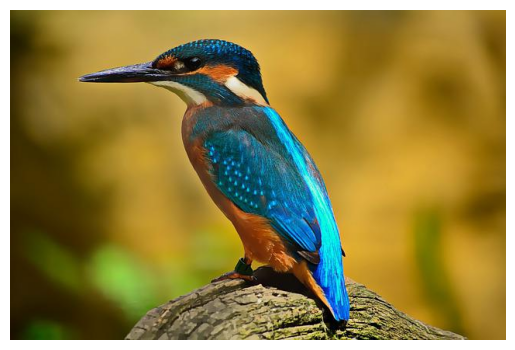

In [24]:
img = plt.imread("./dataset/kingfisher.jpeg")
plt.axis("off")
plt.imshow(img)
plt.show()

### Exercise 1 - Fitting KMeans With k=2

In [26]:
km  = KMeans(n_clusters=2, random_state=
             42)
X = img.reshape(-1, 1)
km.fit(X)

KMeans(n_clusters=2, random_state=42)

### Exercise 2 - Viewing Segmented Image


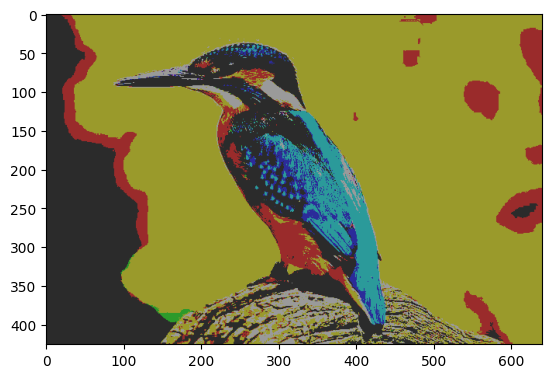

In [30]:
seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)

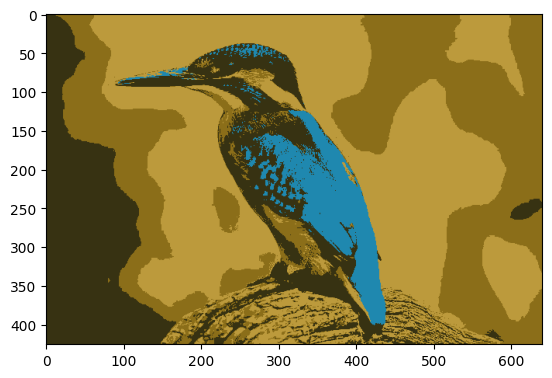

In [32]:
k = 4

X = img.reshape(-1, 3)
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

seg = np.zeros(X.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
seg = seg.reshape(img.shape).astype(np.uint8)
plt.imshow(seg)